In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbPipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay,
                             precision_recall_curve)
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model, Sequential
from tqdm.keras import TqdmCallback
tf.random.set_seed(42)
print(tf.__version__)
import warnings
warnings.filterwarnings('ignore')

2.14.0


In [9]:
seed = 1
accuracy = 'average_precision'
lr_max_iterations = 10000

In [11]:
df = pd.read_csv("creditcard.csv")
assert(df.shape[0] == 284807)
assert(df.shape[1] == 31)

In [12]:
X_orig = df.drop('Class', axis=1) 
y_orig = df.Class 
X_train, X_test, y_train, y_test = train_test_split(X_orig, y_orig, test_size=0.2,
                                                    random_state=seed, stratify=y_orig)
test_data = [X_test, y_test]
print(f"Training data class counts:\n{y_train.value_counts()}")
print('')
print(f"Test data class counts:\n{y_test.value_counts()}")
print('')
assert(y_test.shape[0]/y_orig.shape[0] > 0.19)

Training data class counts:
0    227451
1       394
Name: Class, dtype: int64

Test data class counts:
0    56864
1       98
Name: Class, dtype: int64



In [13]:
oversampler = SMOTE(random_state=2)
X_train_res, y_train_res = oversampler.fit_resample(X_train, y_train)

In [14]:
import tensorflow as tf

# Adding layers in ANN
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(input_dim = 30, units=30, activation='relu'))
ann.add(tf.keras.layers.Dense(units=30, activation='relu'))
ann.add(tf.keras.layers.Dense(units=30, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
print("Model training start........")
ann.fit(X_train, y_train, batch_size = 15, epochs = 5)

Model training start........
Epoch 1/5
15190/15190 [==============================] - 17s 1ms/step - loss: 3.6688 - accuracy: 0.9970
Epoch 2/5
15190/15190 [==============================] - 15s 1ms/step - loss: 0.0394 - accuracy: 0.9982
Epoch 3/5
15190/15190 [==============================] - 17s 1ms/step - loss: 0.0281 - accuracy: 0.9982
Epoch 4/5
15190/15190 [==============================] - 17s 1ms/step - loss: 0.0294 - accuracy: 0.9982
Epoch 5/5
15190/15190 [==============================] - 17s 1ms/step - loss: 0.0214 - accuracy: 0.9983


1781/1781 [==============================] - 1s 746us/step


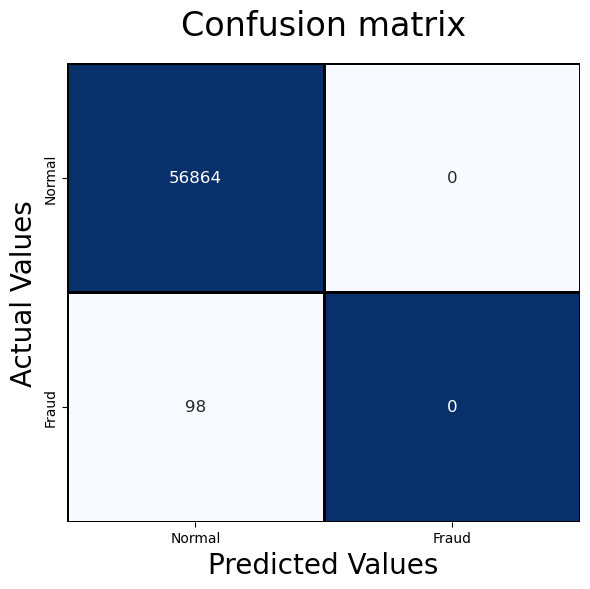

Classified 	0 out of 98 	fraud cases correctly
Misclassified 	0 out of 56864 normal cases
AROC score :- 
 0.5


In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
# predict result using test dataset
y_pred3 = ann.predict(X_test)
y_pred3 = (y_pred3 >= 0.1)
num_fraud_cases_in_test = len(y_test[y_test==1])
num_normal_cases_in_test = len(y_test[y_test==0])
cm = confusion_matrix(y_test, y_pred3)
fig,ax = plt.subplots(figsize = (6,6))
sns.heatmap(np.eye(2), annot=cm, fmt='g', annot_kws={'size': 12},
            cmap='Blues', cbar=False,
            yticklabels=['Normal', 'Fraud'], xticklabels=['Normal', 'Fraud'], ax=ax,linewidths=2,linecolor = 'black')
ax.set_title('Confusion matrix', size=24, pad=20)
ax.set_xlabel('Predicted Values', size=20)
ax.set_ylabel('Actual Values', size=20)
plt.tight_layout()
plt.show()
print(f"Classified \t{cm[1,1]} out of {num_fraud_cases_in_test} \tfraud cases correctly")
print(f"Misclassified \t{cm[0,1]} out of {num_normal_cases_in_test} normal cases")
print(f"AROC score :- \n {roc_auc_score(y_test, y_pred3)}")

1781/1781 [==============================] - 1s 746us/step


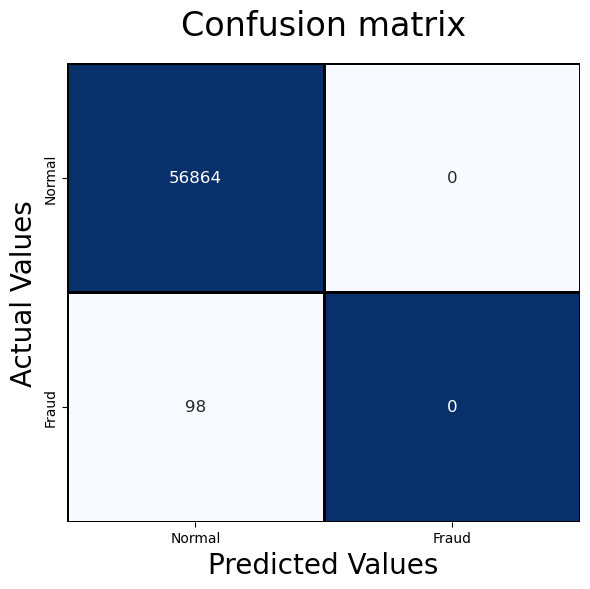

Classified 	0 out of 98 	fraud cases correctly
Misclassified 	0 out of 56864 normal cases
AROC score :- 
 0.5


In [21]:
y_pred3 = ann.predict(X_test)
y_pred3 = (y_pred3 >= 0.2)
num_fraud_cases_in_test = len(y_test[y_test==1])
num_normal_cases_in_test = len(y_test[y_test==0])
cm = confusion_matrix(y_test, y_pred3)
fig,ax = plt.subplots(figsize = (6,6))
sns.heatmap(np.eye(2), annot=cm, fmt='g', annot_kws={'size': 12},
            cmap='Blues', cbar=False,
            yticklabels=['Normal', 'Fraud'], xticklabels=['Normal', 'Fraud'], ax=ax,linewidths=2,linecolor = 'black')
ax.set_title('Confusion matrix', size=24, pad=20)
ax.set_xlabel('Predicted Values', size=20)
ax.set_ylabel('Actual Values', size=20)
plt.tight_layout()
plt.show()
print(f"Classified \t{cm[1,1]} out of {num_fraud_cases_in_test} \tfraud cases correctly")
print(f"Misclassified \t{cm[0,1]} out of {num_normal_cases_in_test} normal cases")
print(f"AROC score :- \n {roc_auc_score(y_test, y_pred3)}")

1781/1781 [==============================] - 1s 737us/step


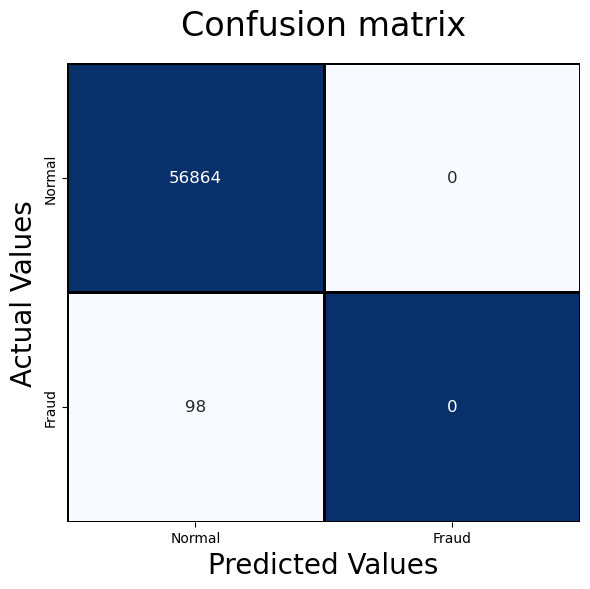

Classified 	0 out of 98 	fraud cases correctly
Misclassified 	0 out of 56864 normal cases
AROC score :- 
 0.5


In [16]:
y_pred3 = ann.predict(X_test)
y_pred3 = (y_pred3 >= 0.3)
num_fraud_cases_in_test = len(y_test[y_test==1])
num_normal_cases_in_test = len(y_test[y_test==0])
cm = confusion_matrix(y_test, y_pred3)
fig,ax = plt.subplots(figsize = (6,6))
sns.heatmap(np.eye(2), annot=cm, fmt='g', annot_kws={'size': 12},
            cmap='Blues', cbar=False,
            yticklabels=['Normal', 'Fraud'], xticklabels=['Normal', 'Fraud'], ax=ax,linewidths=2,linecolor = 'black')
ax.set_title('Confusion matrix', size=24, pad=20)
ax.set_xlabel('Predicted Values', size=20)
ax.set_ylabel('Actual Values', size=20)
plt.tight_layout()
plt.show()
print(f"Classified \t{cm[1,1]} out of {num_fraud_cases_in_test} \tfraud cases correctly")
print(f"Misclassified \t{cm[0,1]} out of {num_normal_cases_in_test} normal cases")
print(f"AROC score :- \n {roc_auc_score(y_test, y_pred3)}")

1781/1781 [==============================] - 1s 712us/step


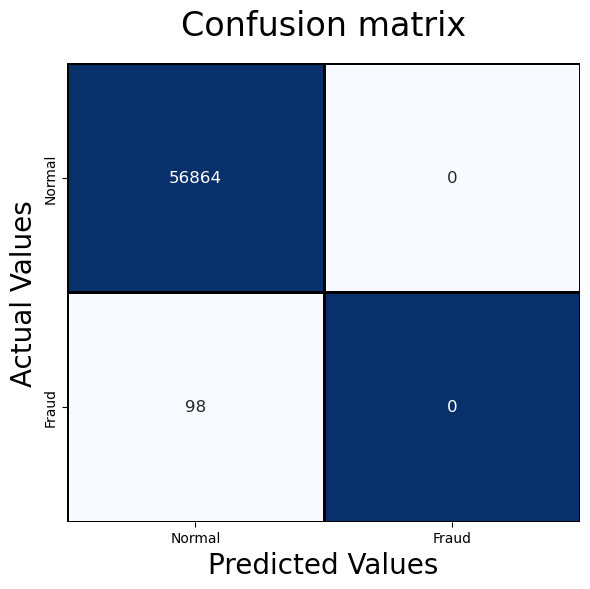

Classified 	0 out of 98 	fraud cases correctly
Misclassified 	0 out of 56864 normal cases
AROC score :- 
 0.5


In [17]:
y_pred3 = ann.predict(X_test)
y_pred3 = (y_pred3 >= 0.4)
num_fraud_cases_in_test = len(y_test[y_test==1])
num_normal_cases_in_test = len(y_test[y_test==0])
cm = confusion_matrix(y_test, y_pred3)
fig,ax = plt.subplots(figsize = (6,6))
sns.heatmap(np.eye(2), annot=cm, fmt='g', annot_kws={'size': 12},
            cmap='Blues', cbar=False,
            yticklabels=['Normal', 'Fraud'], xticklabels=['Normal', 'Fraud'], ax=ax,linewidths=2,linecolor = 'black')
ax.set_title('Confusion matrix', size=24, pad=20)
ax.set_xlabel('Predicted Values', size=20)
ax.set_ylabel('Actual Values', size=20)
plt.tight_layout()
plt.show()
print(f"Classified \t{cm[1,1]} out of {num_fraud_cases_in_test} \tfraud cases correctly")
print(f"Misclassified \t{cm[0,1]} out of {num_normal_cases_in_test} normal cases")
print(f"AROC score :- \n {roc_auc_score(y_test, y_pred3)}")

1781/1781 [==============================] - 1s 726us/step


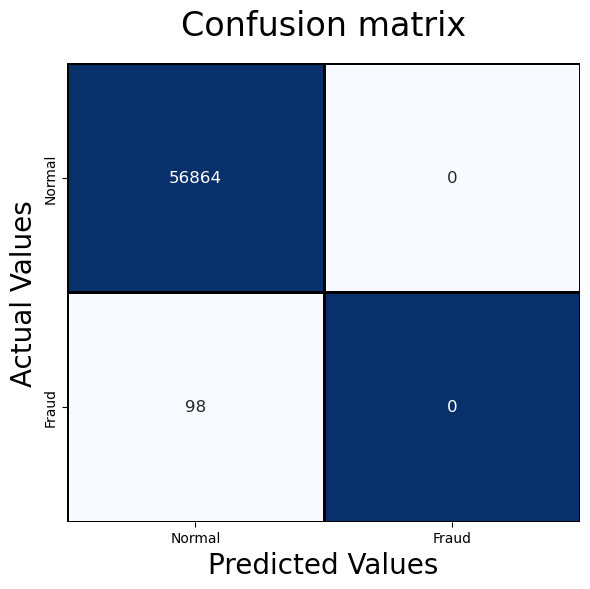

Classified 	0 out of 98 	fraud cases correctly
Misclassified 	0 out of 56864 normal cases
AROC score :- 
 0.5


In [18]:
y_pred3 = ann.predict(X_test)
y_pred3 = (y_pred3 >= 0.5)
num_fraud_cases_in_test = len(y_test[y_test==1])
num_normal_cases_in_test = len(y_test[y_test==0])
cm = confusion_matrix(y_test, y_pred3)
fig,ax = plt.subplots(figsize = (6,6))
sns.heatmap(np.eye(2), annot=cm, fmt='g', annot_kws={'size': 12},
            cmap='Blues', cbar=False,
            yticklabels=['Normal', 'Fraud'], xticklabels=['Normal', 'Fraud'], ax=ax,linewidths=2,linecolor = 'black')
ax.set_title('Confusion matrix', size=24, pad=20)
ax.set_xlabel('Predicted Values', size=20)
ax.set_ylabel('Actual Values', size=20)
plt.tight_layout()
plt.show()
print(f"Classified \t{cm[1,1]} out of {num_fraud_cases_in_test} \tfraud cases correctly")
print(f"Misclassified \t{cm[0,1]} out of {num_normal_cases_in_test} normal cases")
print(f"AROC score :- \n {roc_auc_score(y_test, y_pred3)}")

1781/1781 [==============================] - 1s 756us/step


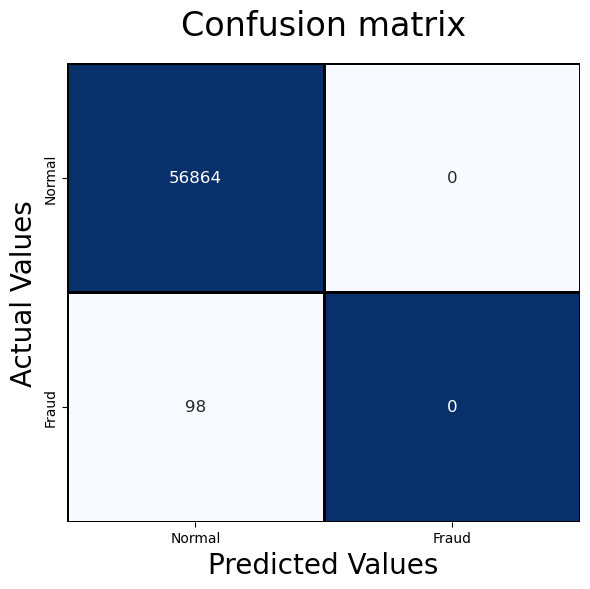

Classified 	0 out of 98 	fraud cases correctly
Misclassified 	0 out of 56864 normal cases
AROC score :- 
 0.5


In [22]:
y_pred3 = ann.predict(X_test)
y_pred3 = (y_pred3 >= 0.6)
num_fraud_cases_in_test = len(y_test[y_test==1])
num_normal_cases_in_test = len(y_test[y_test==0])
cm = confusion_matrix(y_test, y_pred3)
fig,ax = plt.subplots(figsize = (6,6))
sns.heatmap(np.eye(2), annot=cm, fmt='g', annot_kws={'size': 12},
            cmap='Blues', cbar=False,
            yticklabels=['Normal', 'Fraud'], xticklabels=['Normal', 'Fraud'], ax=ax,linewidths=2,linecolor = 'black')
ax.set_title('Confusion matrix', size=24, pad=20)
ax.set_xlabel('Predicted Values', size=20)
ax.set_ylabel('Actual Values', size=20)
plt.tight_layout()
plt.show()
print(f"Classified \t{cm[1,1]} out of {num_fraud_cases_in_test} \tfraud cases correctly")
print(f"Misclassified \t{cm[0,1]} out of {num_normal_cases_in_test} normal cases")
print(f"AROC score :- \n {roc_auc_score(y_test, y_pred3)}")

1781/1781 [==============================] - 1s 767us/step


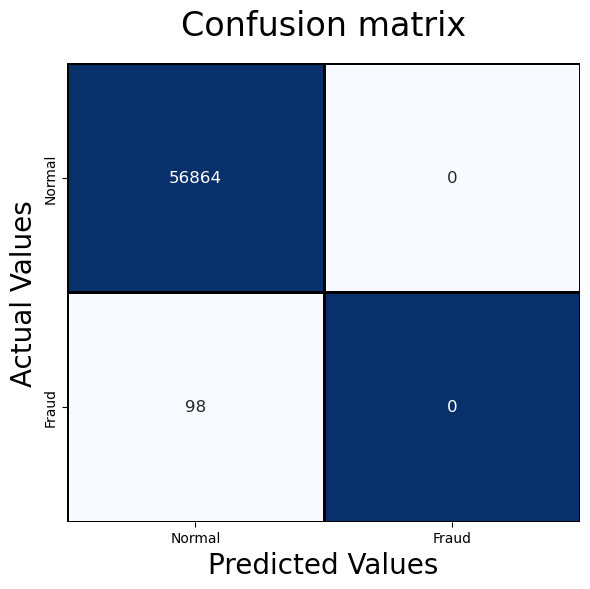

Classified 	0 out of 98 	fraud cases correctly
Misclassified 	0 out of 56864 normal cases
AROC score :- 
 0.5


In [19]:
y_pred3 = ann.predict(X_test)
y_pred3 = (y_pred3 >= 0.7)
num_fraud_cases_in_test = len(y_test[y_test==1])
num_normal_cases_in_test = len(y_test[y_test==0])
cm = confusion_matrix(y_test, y_pred3)
fig,ax = plt.subplots(figsize = (6,6))
sns.heatmap(np.eye(2), annot=cm, fmt='g', annot_kws={'size': 12},
            cmap='Blues', cbar=False,
            yticklabels=['Normal', 'Fraud'], xticklabels=['Normal', 'Fraud'], ax=ax,linewidths=2,linecolor = 'black')
ax.set_title('Confusion matrix', size=24, pad=20)
ax.set_xlabel('Predicted Values', size=20)
ax.set_ylabel('Actual Values', size=20)
plt.tight_layout()
plt.show()
print(f"Classified \t{cm[1,1]} out of {num_fraud_cases_in_test} \tfraud cases correctly")
print(f"Misclassified \t{cm[0,1]} out of {num_normal_cases_in_test} normal cases")
print(f"AROC score :- \n {roc_auc_score(y_test, y_pred3)}")

1781/1781 [==============================] - 1s 742us/step


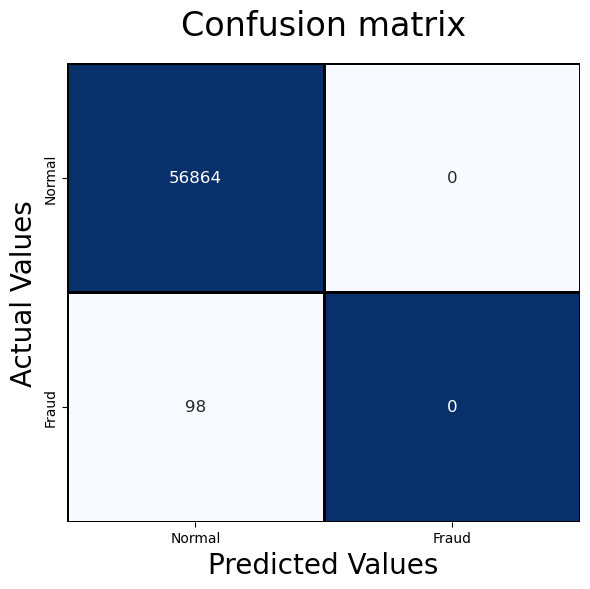

Classified 	0 out of 98 	fraud cases correctly
Misclassified 	0 out of 56864 normal cases
AROC score :- 
 0.5


In [20]:
y_pred3 = ann.predict(X_test)
y_pred3 = (y_pred3 >= 0.8)
num_fraud_cases_in_test = len(y_test[y_test==1])
num_normal_cases_in_test = len(y_test[y_test==0])
cm = confusion_matrix(y_test, y_pred3)
fig,ax = plt.subplots(figsize = (6,6))
sns.heatmap(np.eye(2), annot=cm, fmt='g', annot_kws={'size': 12},
            cmap='Blues', cbar=False,
            yticklabels=['Normal', 'Fraud'], xticklabels=['Normal', 'Fraud'], ax=ax,linewidths=2,linecolor = 'black')
ax.set_title('Confusion matrix', size=24, pad=20)
ax.set_xlabel('Predicted Values', size=20)
ax.set_ylabel('Actual Values', size=20)
plt.tight_layout()
plt.show()
print(f"Classified \t{cm[1,1]} out of {num_fraud_cases_in_test} \tfraud cases correctly")
print(f"Misclassified \t{cm[0,1]} out of {num_normal_cases_in_test} normal cases")
print(f"AROC score :- \n {roc_auc_score(y_test, y_pred3)}")

1781/1781 [==============================] - 1s 729us/step


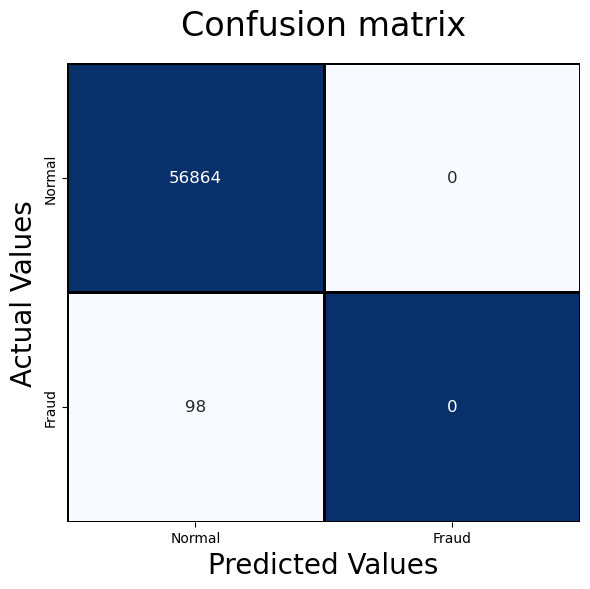

Classified 	0 out of 98 	fraud cases correctly
Misclassified 	0 out of 56864 normal cases
AROC score :- 
 0.5


In [23]:
y_pred3 = ann.predict(X_test)
y_pred3 = (y_pred3 >= 0.9)
num_fraud_cases_in_test = len(y_test[y_test==1])
num_normal_cases_in_test = len(y_test[y_test==0])
cm = confusion_matrix(y_test, y_pred3)
fig,ax = plt.subplots(figsize = (6,6))
sns.heatmap(np.eye(2), annot=cm, fmt='g', annot_kws={'size': 12},
            cmap='Blues', cbar=False,
            yticklabels=['Normal', 'Fraud'], xticklabels=['Normal', 'Fraud'], ax=ax,linewidths=2,linecolor = 'black')
ax.set_title('Confusion matrix', size=24, pad=20)
ax.set_xlabel('Predicted Values', size=20)
ax.set_ylabel('Actual Values', size=20)
plt.tight_layout()
plt.show()
print(f"Classified \t{cm[1,1]} out of {num_fraud_cases_in_test} \tfraud cases correctly")
print(f"Misclassified \t{cm[0,1]} out of {num_normal_cases_in_test} normal cases")
print(f"AROC score :- \n {roc_auc_score(y_test, y_pred3)}")